In [7]:
from __future__ import division
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns

In [8]:
import os 
os.listdir('/Users/keithmitchell/Desktop/Repositories/error.correction.benchmarking/code.evaluation/scripts/data')

['all_data.csv',
 'analysis.csv',
 'analysis2.csv',
 'igh.csv',
 'prelim_analysis.csv',
 'rsr_for_r.csv',
 'rsr_from_master.csv',
 'srr_and_t1.csv',
 't1.csv',
 't1_from_master.csv',
 't1_new.csv',
 't3.csv',
 'tra.csv']

In [9]:
os.chdir('/Users/keithmitchell/Desktop/Repositories/error.correction.benchmarking/code.evaluation/scripts/data')
data = pd.read_csv('rsr_from_master.csv')
data.head()

,Unnamed: 0,EC Filename,Wrapper Name,Kmer Size,Read - TP,Read - TN,Read - FN,Read - FN WRONG,Read - FP,Read - FP INDEL,...,Tool,Coverage,Length,Base Sensitivity,Base Precision,Base Gain,Base Accuracy,Dataset,Trim Percent,Trim Effeciency
0,0,bfc_SRR1543964_raw_21.corrected.fastq.gz,run.bfc.sh,21,4041,39832,2521,198,108,0,...,Bfc,NaN,100,0.633644,0.986657,0.625075,0.999532,RSR,0.0,NaN
1,1,bfc_SRR1543965_raw_18.corrected.fastq.gz,run.bfc.sh,18,2375,39991,4120,144,70,0,...,Bfc,NaN,100,0.429239,0.984124,0.422315,0.999386,RSR,0.0,NaN
2,2,bfc_SRR1543965_raw_26.corrected.fastq.gz,run.bfc.sh,26,2671,39991,3876,100,62,0,...,Bfc,NaN,100,0.459250,0.986294,0.452868,0.999420,RSR,0.0,NaN
3,3,bfc_SRR1543965_raw_16.corrected.fastq.gz,run.bfc.sh,16,2236,39983,4252,153,76,0,...,Bfc,NaN,100,0.411520,0.979992,0.403118,0.999366,RSR,0.0,NaN
4,4,bfc_SRR1543964_raw_18.corrected.fastq.gz,run.bfc.sh,18,2304,39831,4256,159,150,0,...,Bfc,NaN,100,0.383428,0.969502,0.371366,0.999230,RSR,0.0,NaN


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


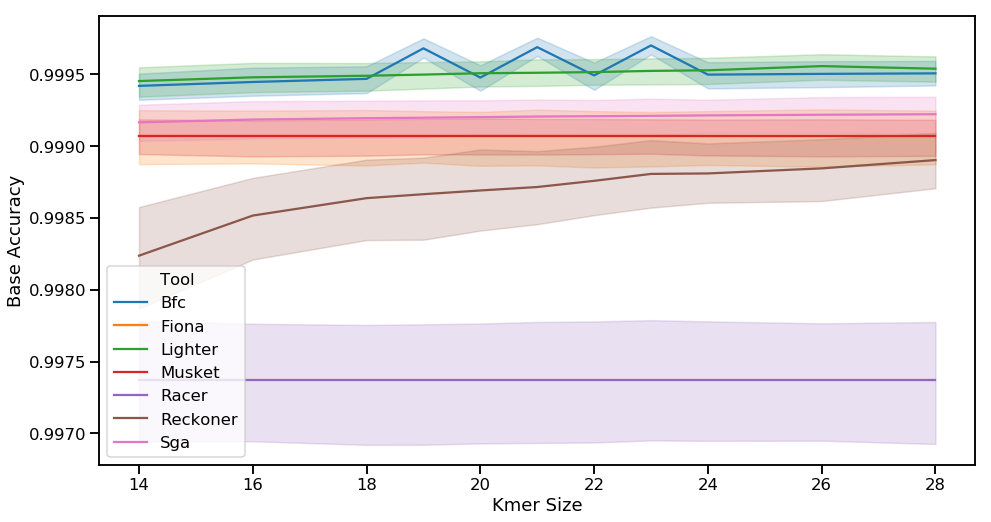

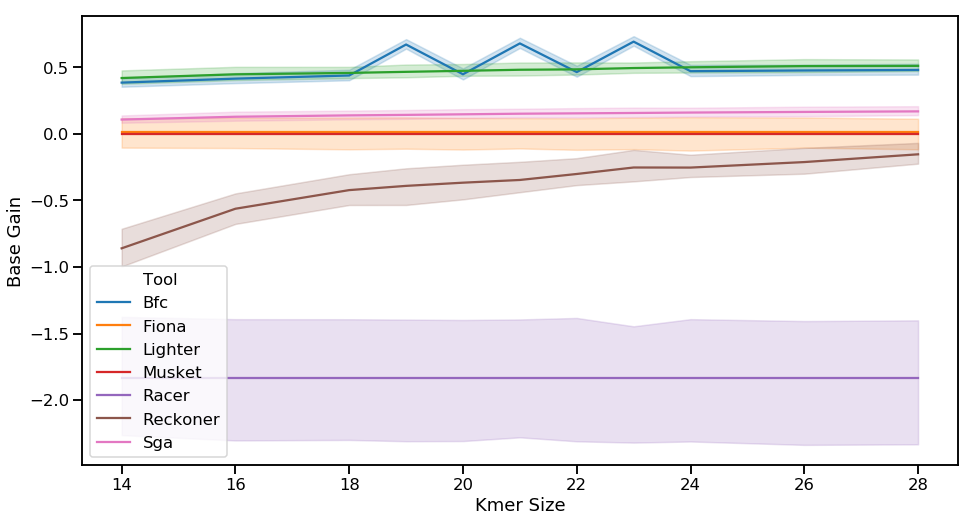

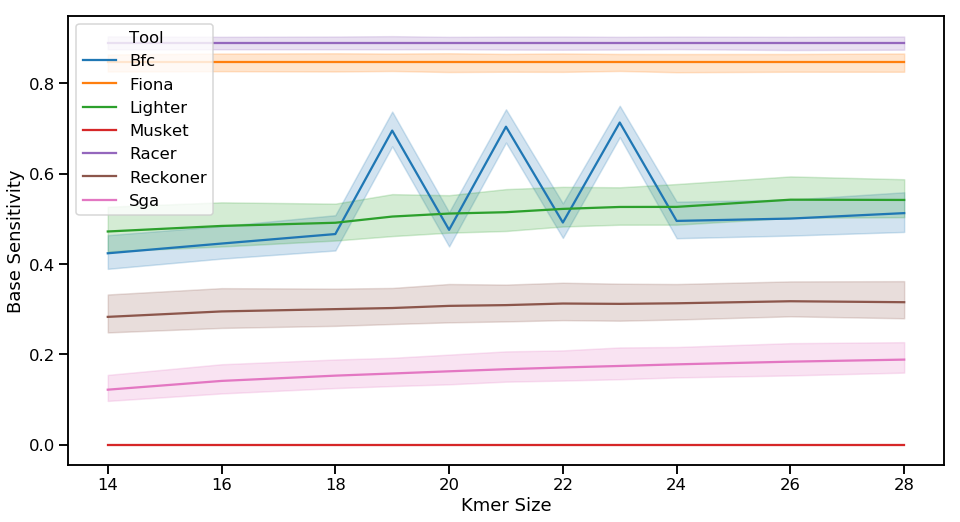

In [10]:
for i in ["Base Accuracy", "Base Gain", "Base Sensitivity"]:
    sns.set_context('talk')
    a4_dims = (15.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    g = sns.lineplot(ax=ax, x="Kmer Size", y=i,
                 hue="Tool",
                 data=data)
    



/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


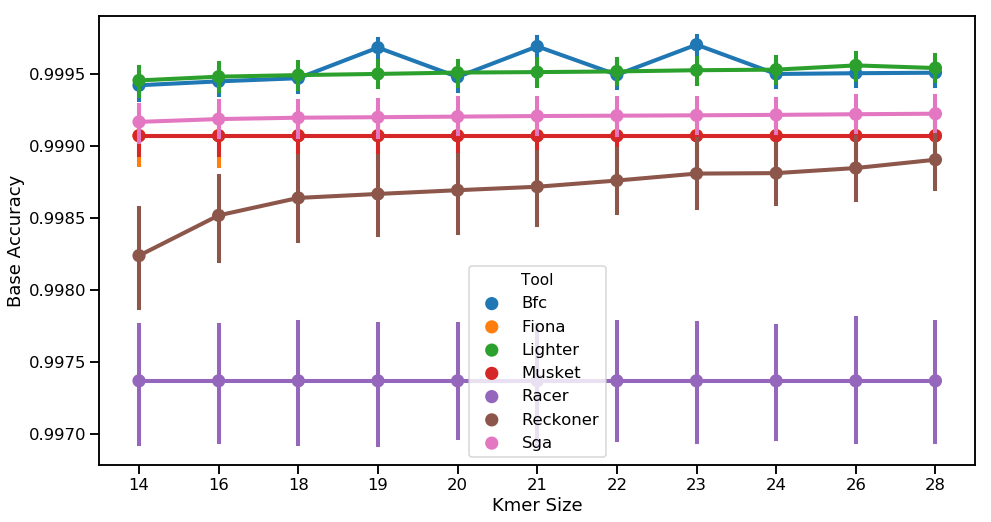

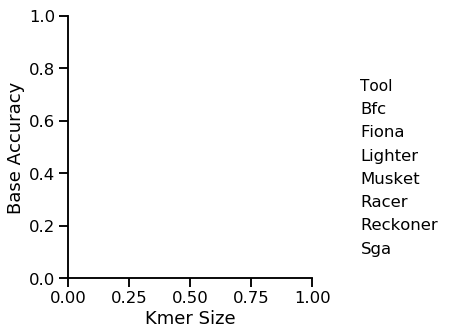

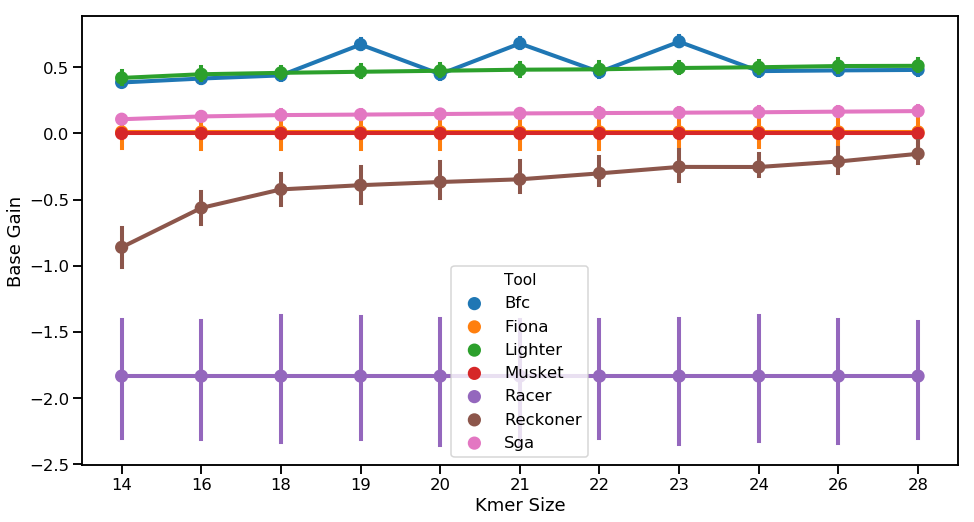

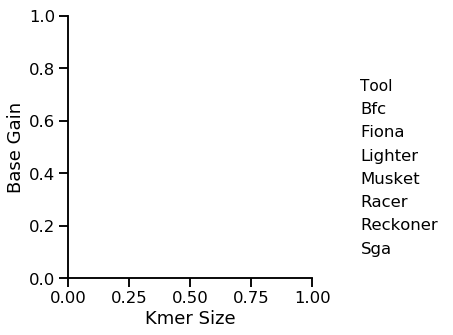

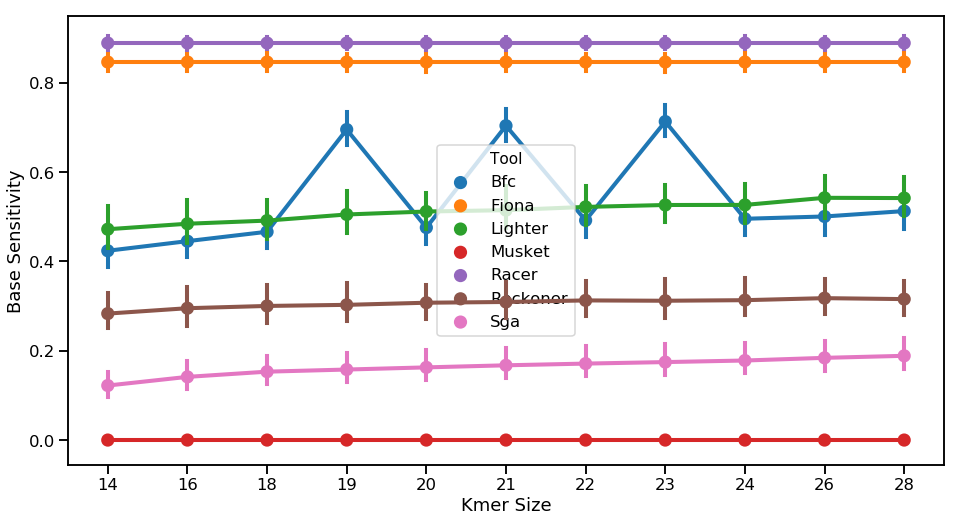

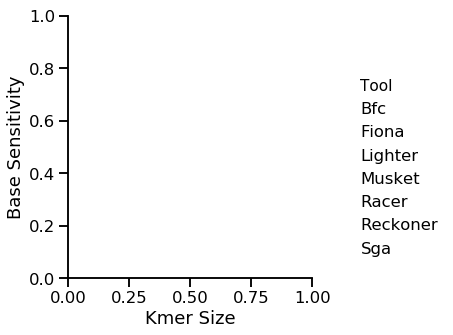

In [11]:
for i in ["Base Accuracy", "Base Gain", "Base Sensitivity"]:
    sns.set_context('talk')
    a4_dims = (15.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    g = sns.catplot(ax=ax, x="Kmer Size", y=i,
                 hue="Tool", kind='point',
                 data=data)
    